In [1]:
from dotenv import load_dotenv
import os
import json
load_dotenv()

API_KEY = os.getenv("RF_API_KEY")
PROJECT_ID = os.getenv("RF_PROJECT_ID")
VERSION = os.getenv("PROJECT_VERSION")

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace().project(PROJECT_ID)
model = project.version(VERSION).model

# infer on a local image
# print(model.predict("imgs/002.png", confidence=40).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

def model_infer(image: str, confidence: int):
    return model.predict(image, confidence).json()

loading Roboflow workspace...
loading Roboflow project...


In [3]:
folder_name = "imgs"
files = os.listdir(folder_name)

def folder_check(folder_name: str):  
    file_names = os.listdir(folder_name)
    for i in file_names:
        if not os.path.exists(i[:-3]):
            os.makedirs(i[:-3])

def write_json_file(data, file_path):
    
    with open(f"{file_path}json", 'w') as file:
        json.dump(data, file)

folder_check(folder_name)
for f in files:
    data = model_infer(f"{folder_name}/{f}", 40)
    write_json_file(data, f"{f[:-3]}/{f[:-3]}")

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

red_flags = ["imgs", 'out.json', 'sample.ipynb', '.env']
images_folder = [x for x in os.listdir(".") if x not in red_flags]
images_folder

['001a',
 '001b',
 '002',
 '003',
 '004',
 '004b',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010a',
 '010b',
 '011',
 '012',
 'gle.ipynb',
 'ocr_output.jpg']

In [5]:
def process_the_image(js, imag, image_save):
    f = open(js)
    g = json.load(f)
    preds = g["predictions"]
    for i in range(len(preds)):
        points = preds[i]["points"]


        # Convert the list of dictionaries to a NumPy array of shape (num_points, 1, 2) and convert to integers
        polygon = np.array([[int(point['x']), int(point['y'])] for point in points], np.int32)

        # Reshape for OpenCV, which expects the shape to be (num_points, 1, 2)
        polygon = polygon.reshape((-1, 1, 2))

        # Load the image
        image = cv2.imread(f'{imag}.png')

        # Create a black mask with the same dimensions as the image
        mask = np.zeros(image.shape[:2], dtype=np.uint8)

        # Fill the polygon with white on the mask
        cv2.fillPoly(mask, [polygon], 255)

        # Apply the mask to the image
        masked_image = cv2.bitwise_and(image, image, mask=mask)
        cv2.imwrite(f"{image_save}/{image_save}_{i}_alone.png",masked_image)

        # Optionally, you can crop the region of interest based on the bounding box of the polygon
        x, y, w, h = cv2.boundingRect(polygon)
        cropped_region = masked_image[y:y+h, x:x+w]

        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Display the masked image in the first subplot
        ax1.imshow(masked_image)
        ax1.set_title('Masked Image')
        ax1.axis('off')

        # Display the cropped region in the second subplot
        ax2.imshow(cropped_region)
        ax2.set_title('Cropped Region')
        ax2.axis('off')

        # Adjust layout to prevent overlap of labels/titles
        plt.tight_layout()

        # plt.savefig(f'{image_save}/{image_save}_{i}.png')

        # Show the figure with both subplots
        plt.show()

001a


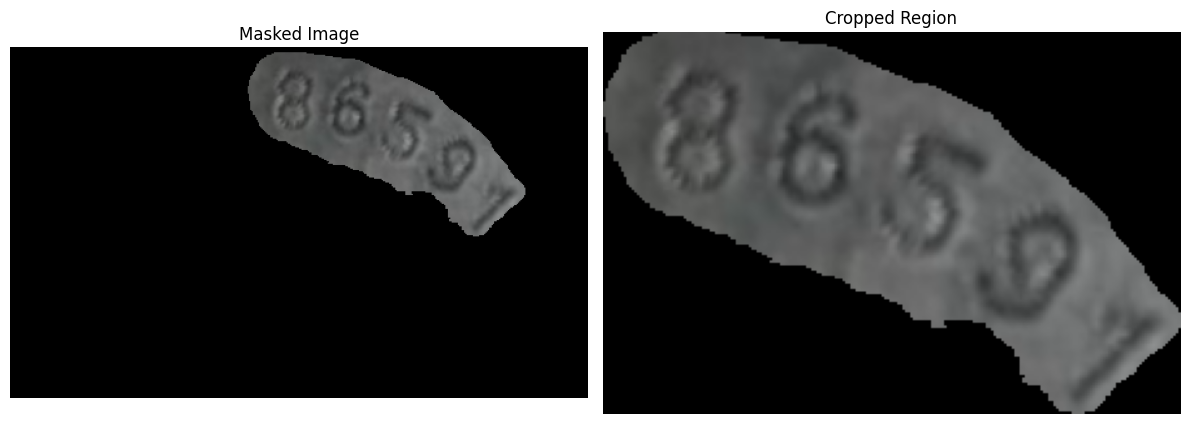

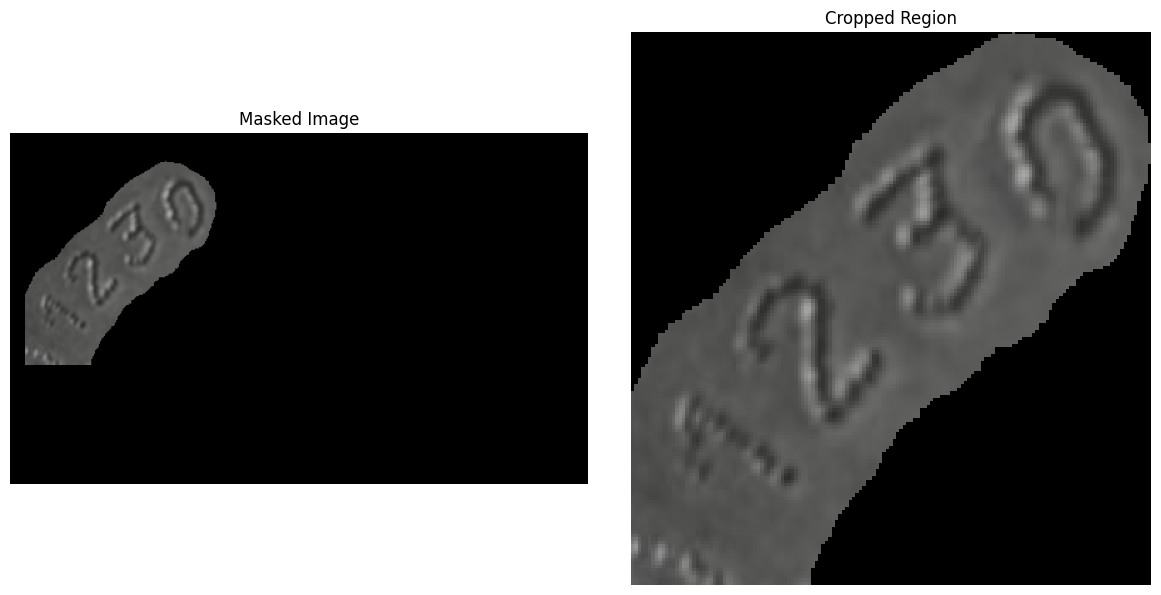

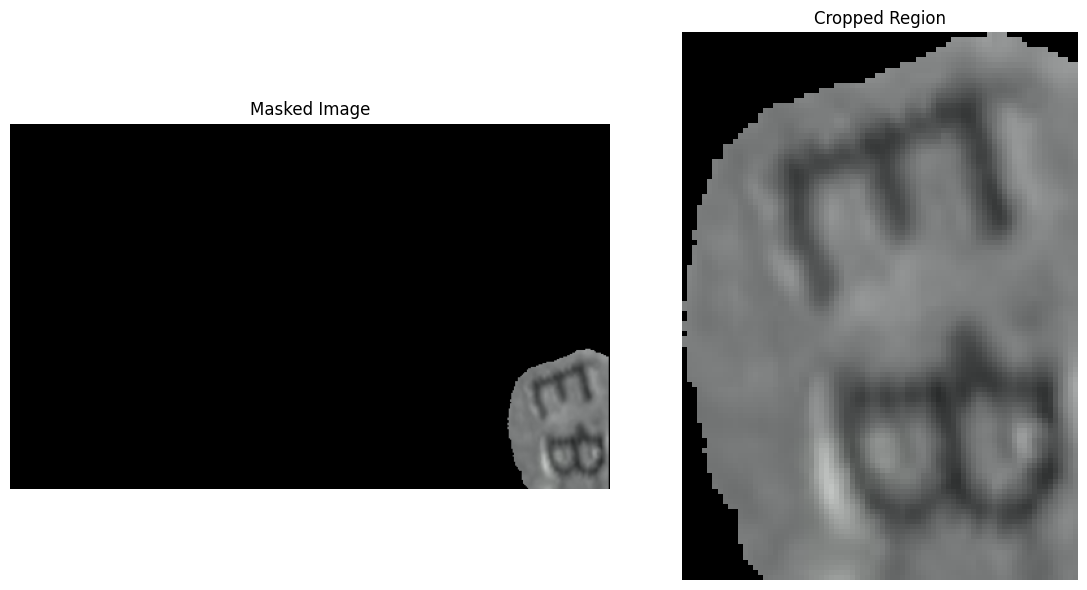

001b


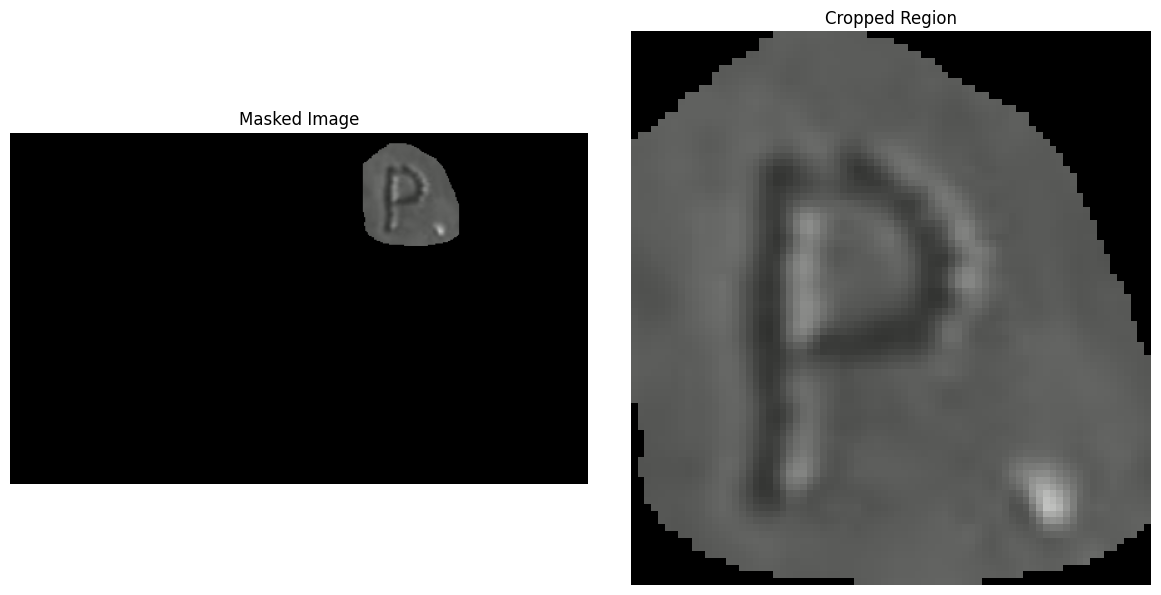

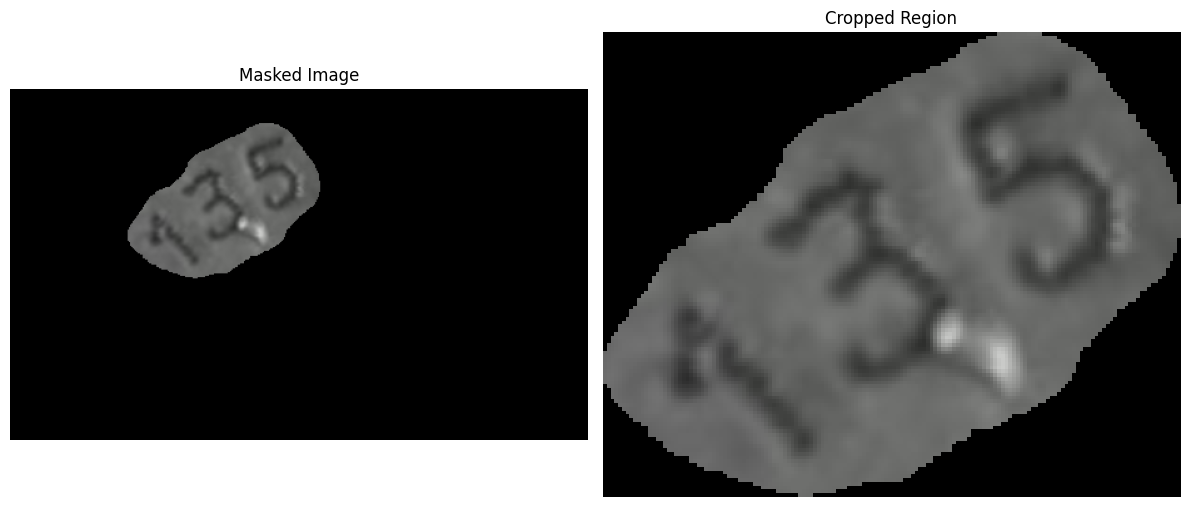

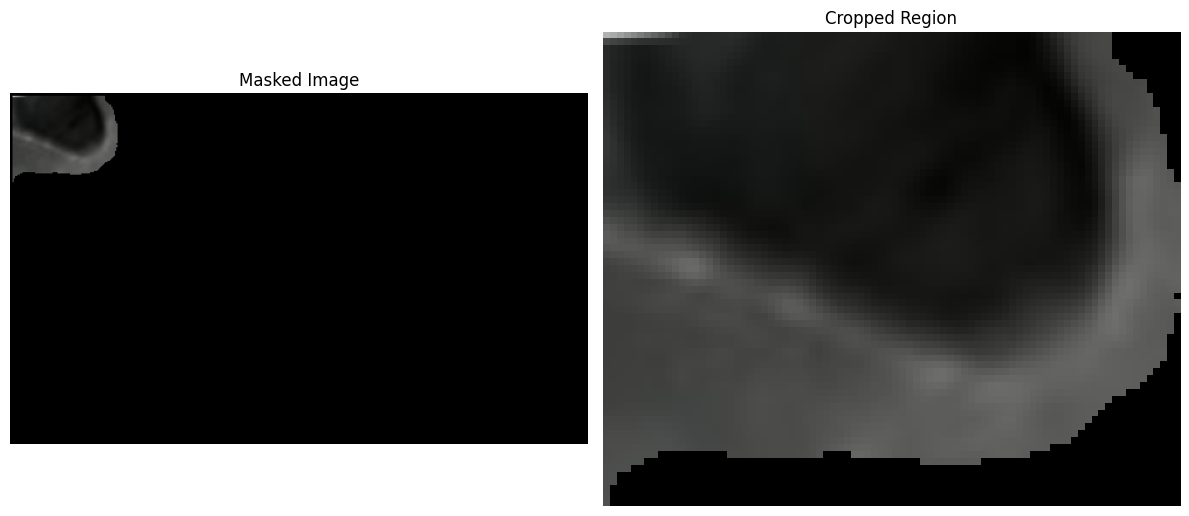

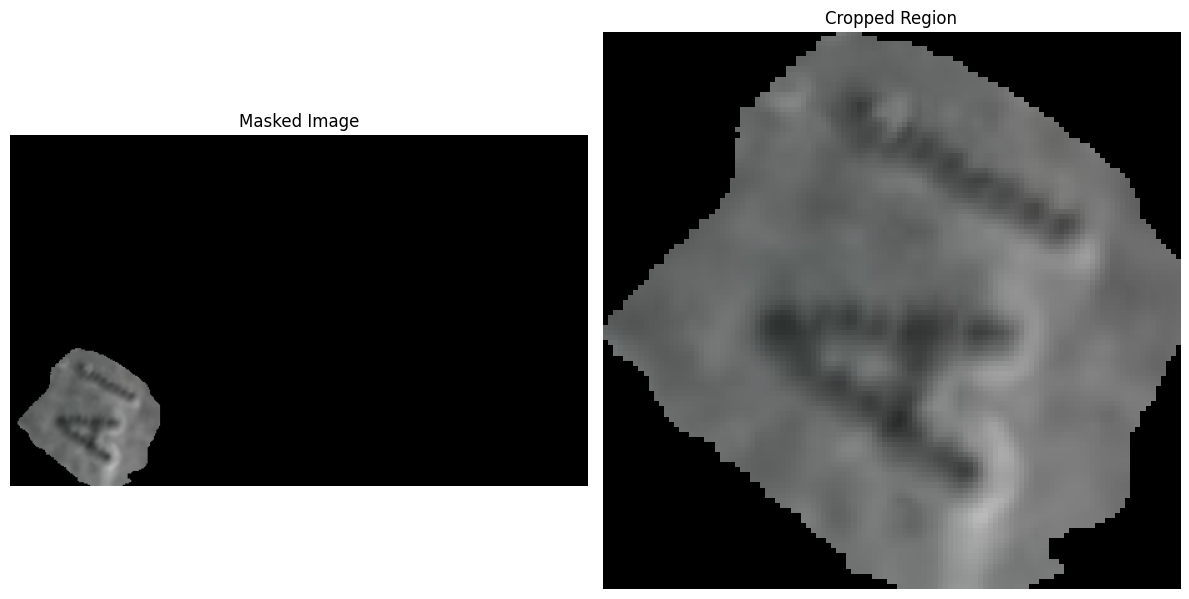

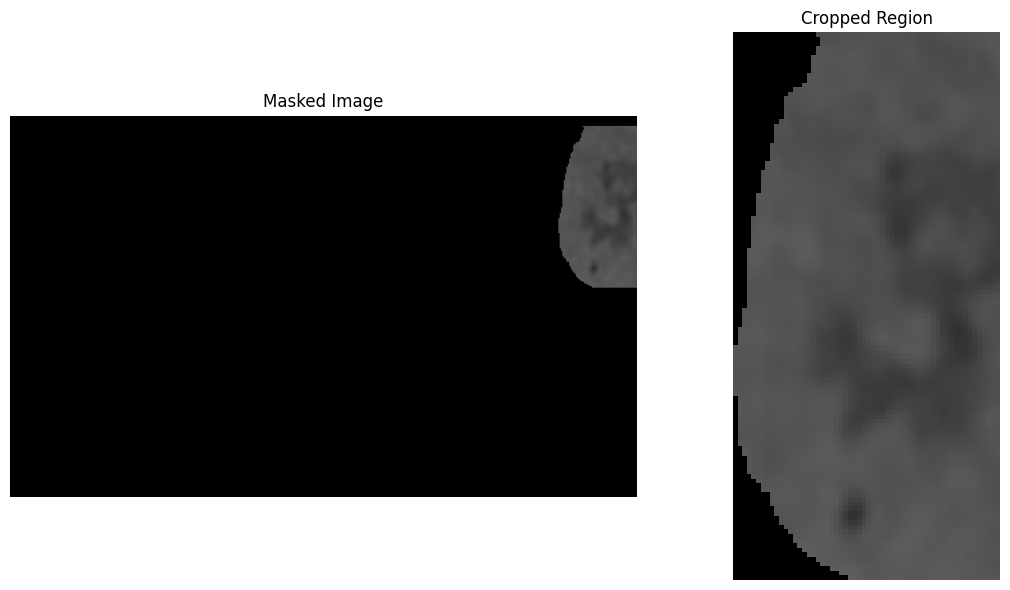

002


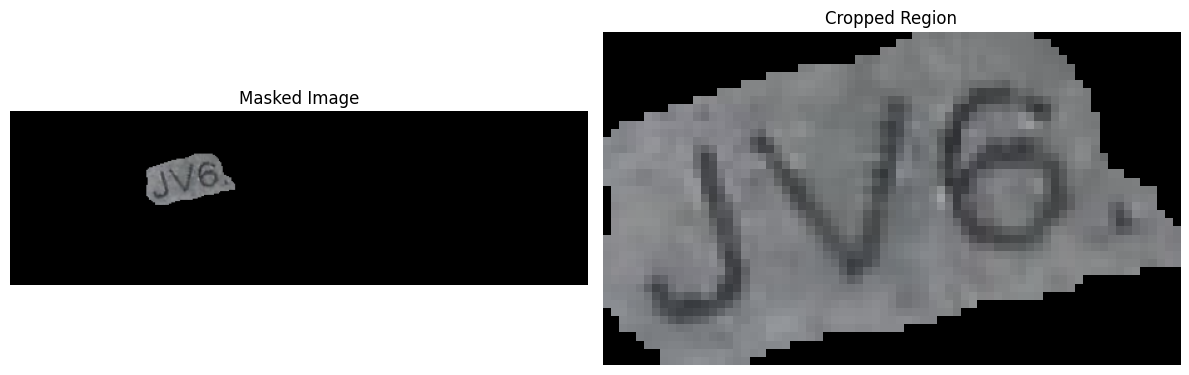

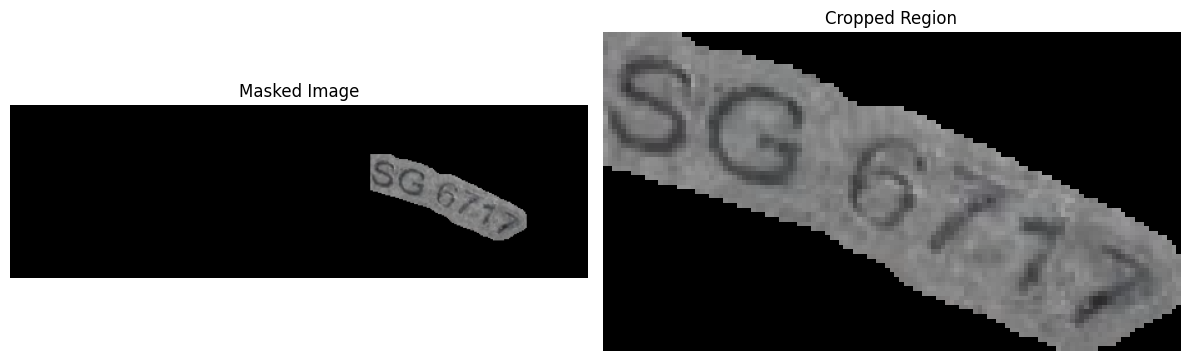

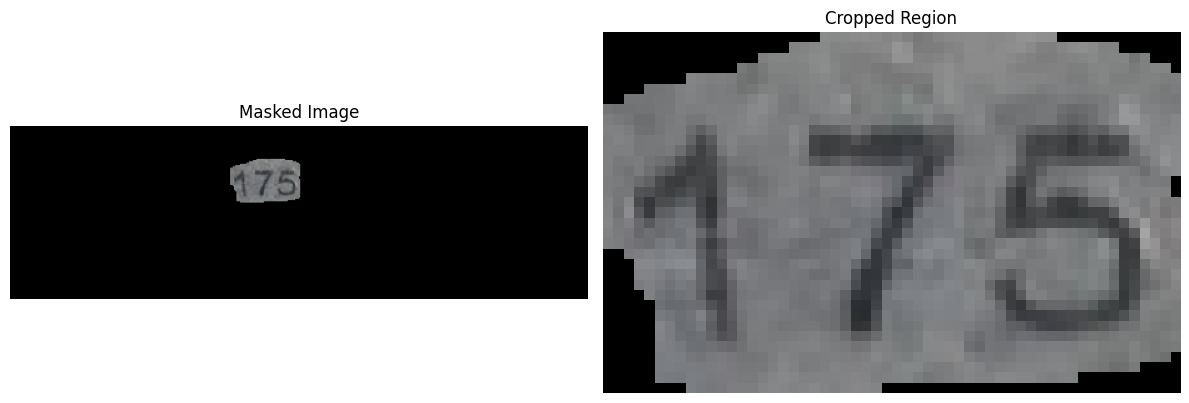

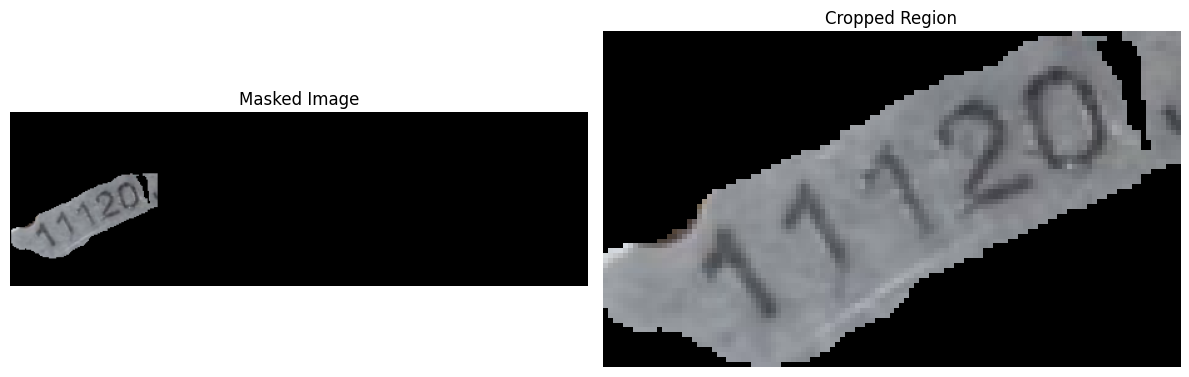

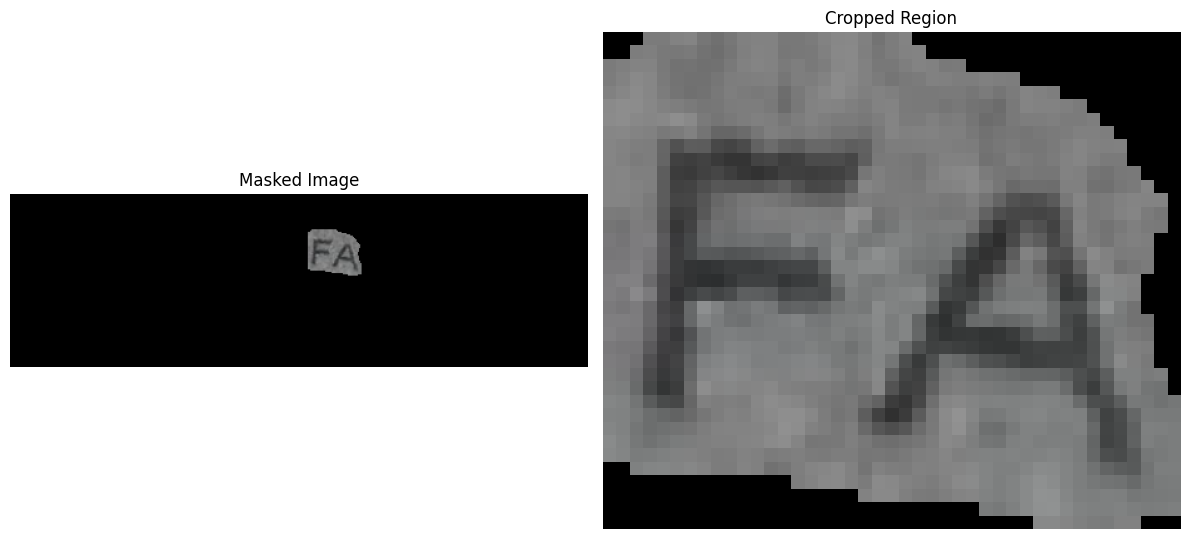

003


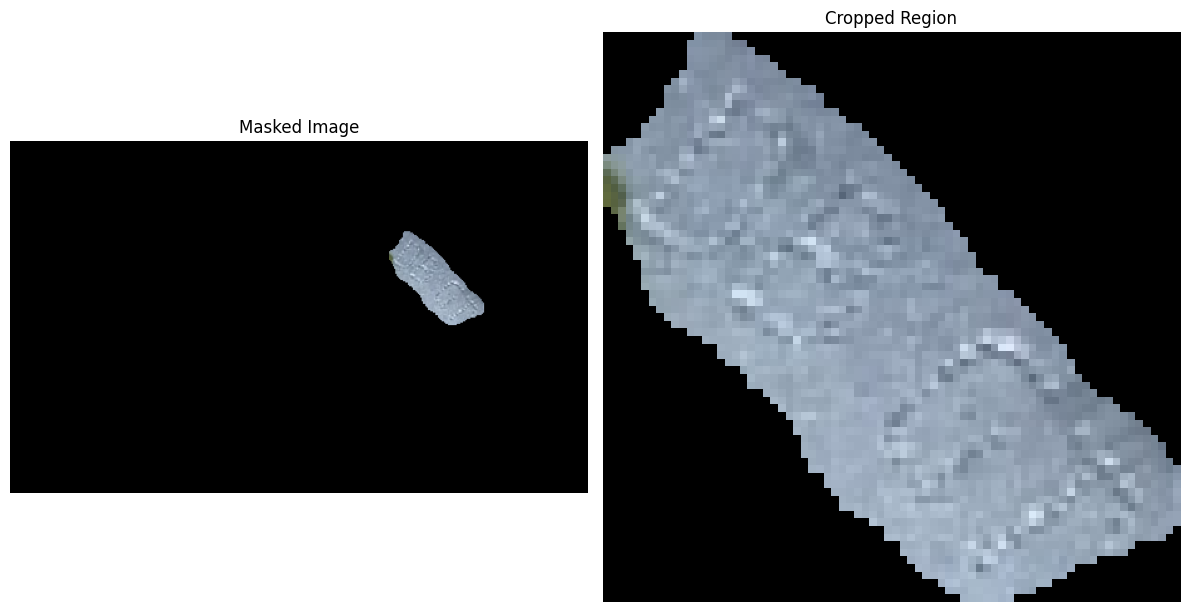

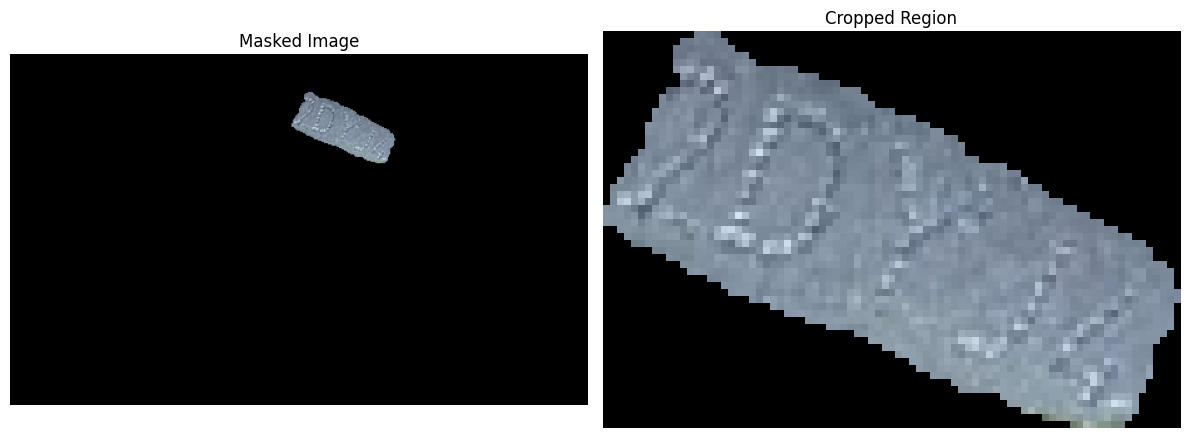

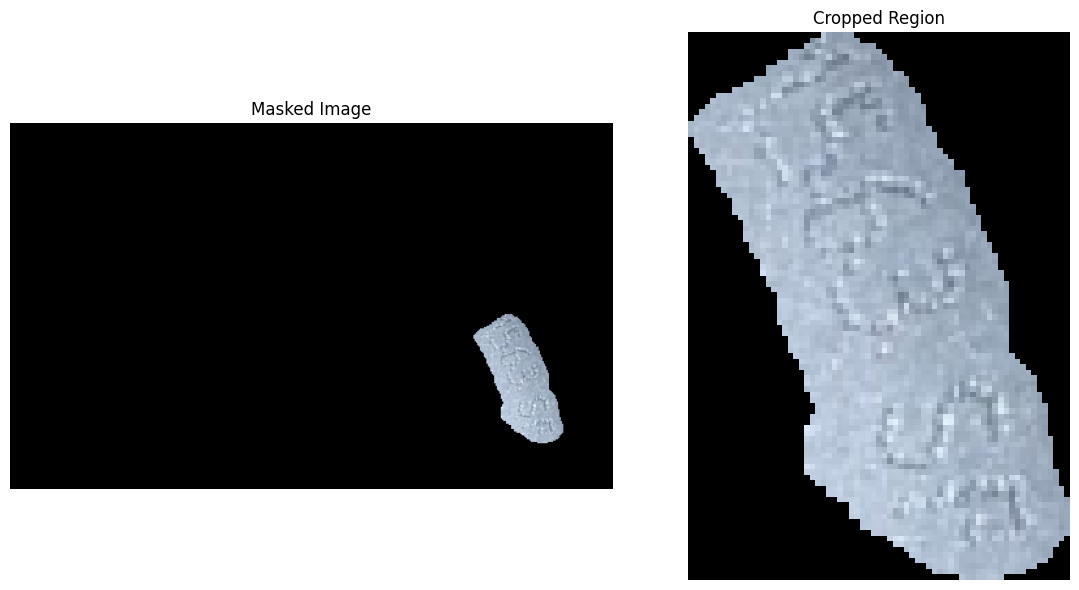

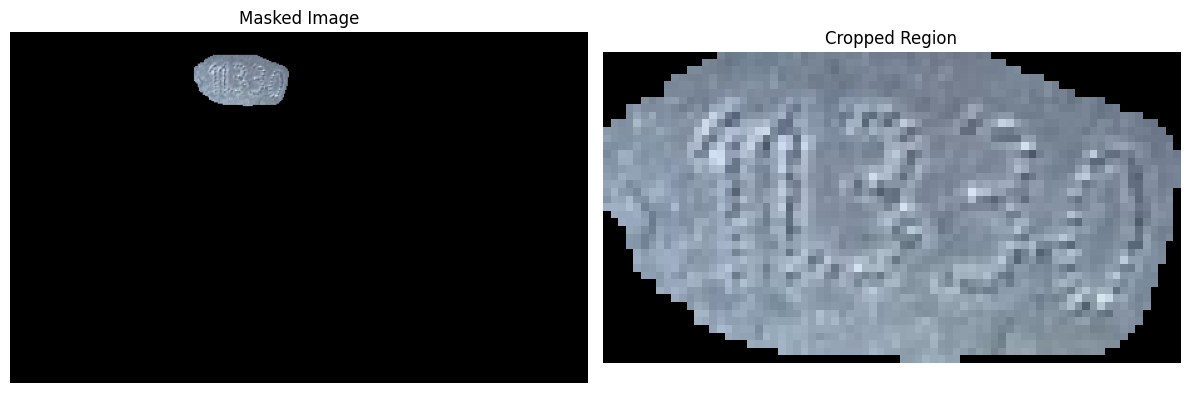

004


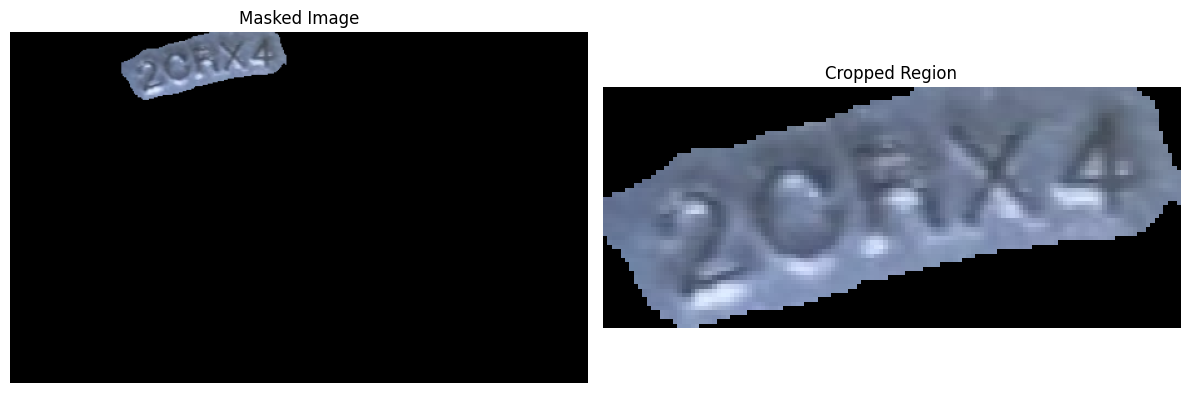

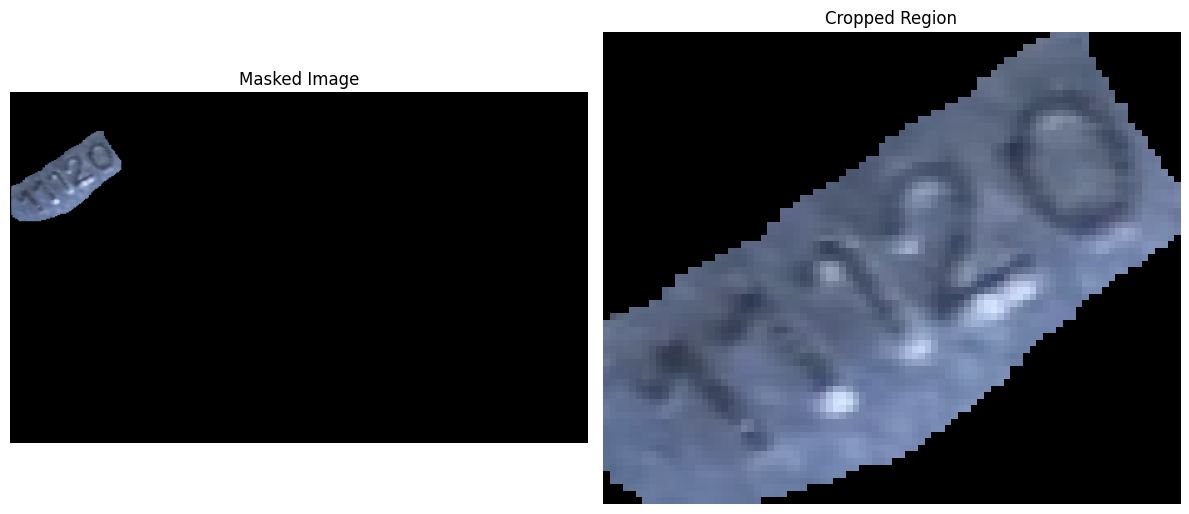

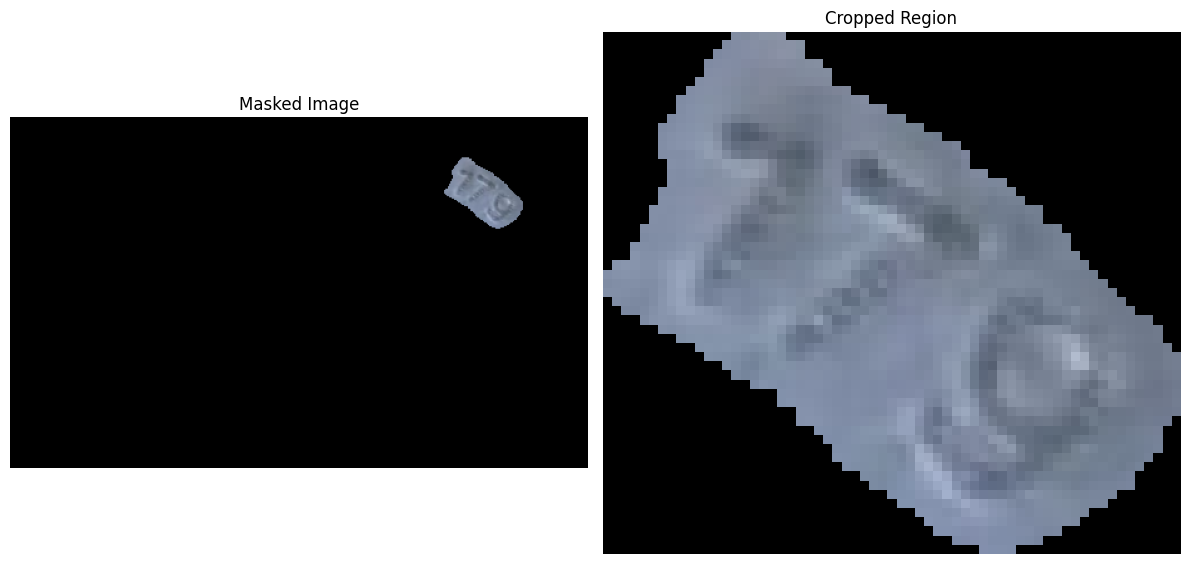

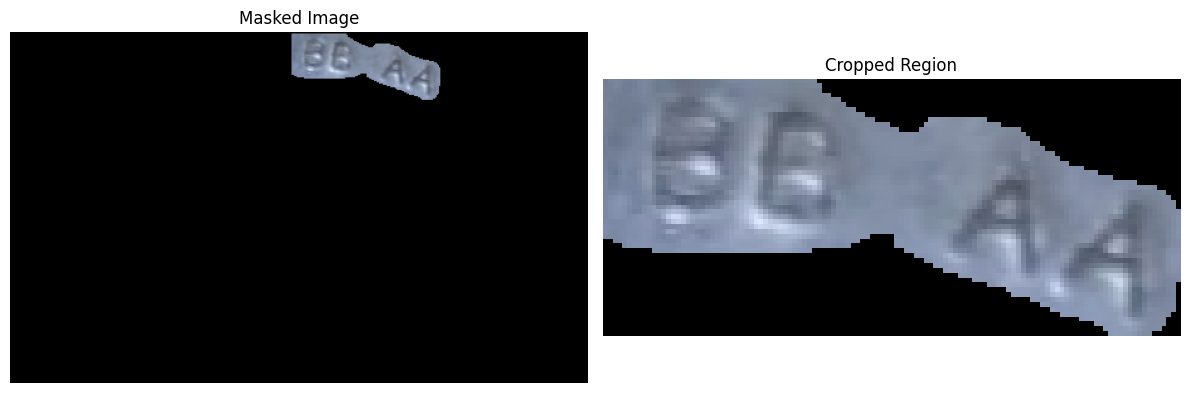

004b


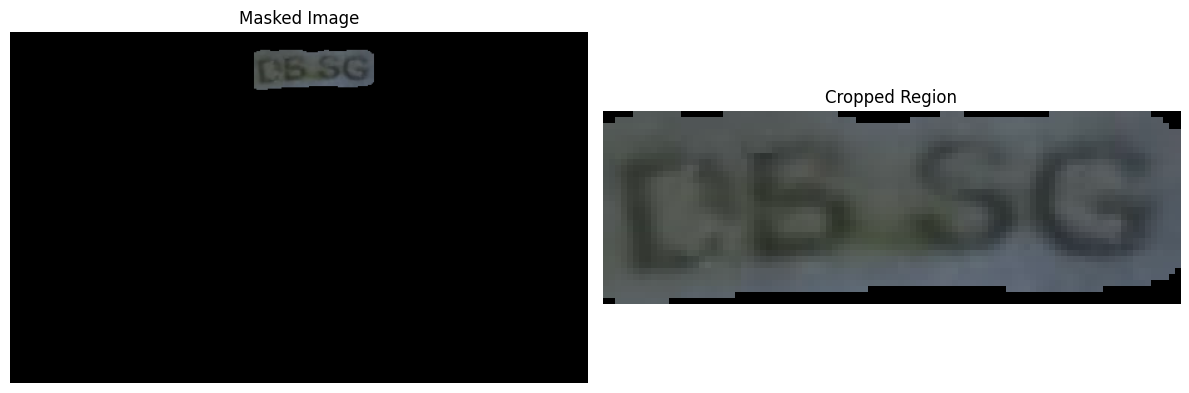

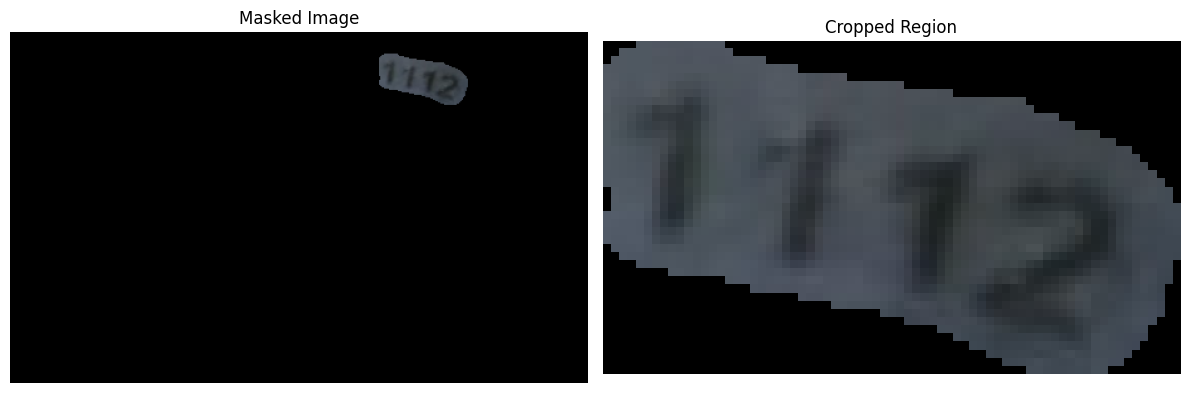

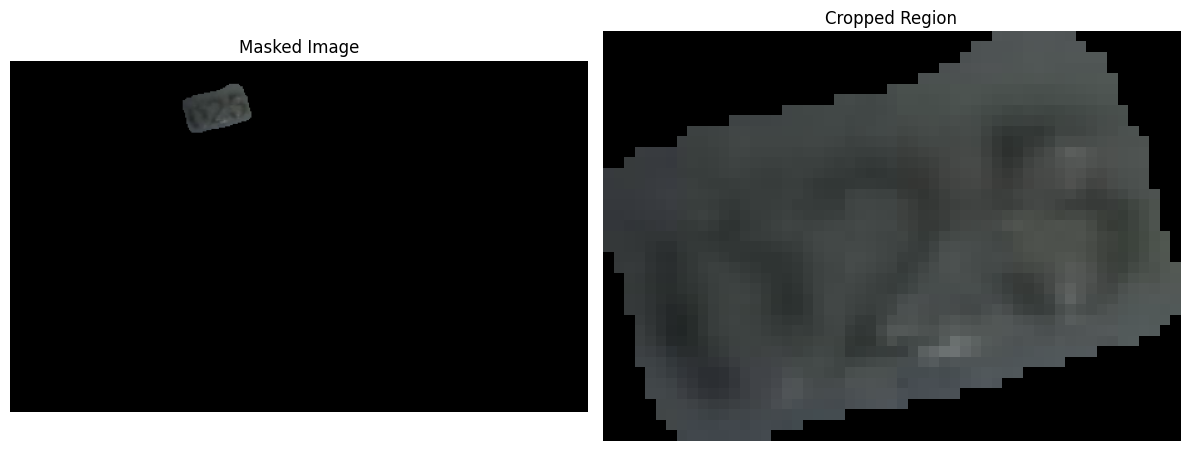

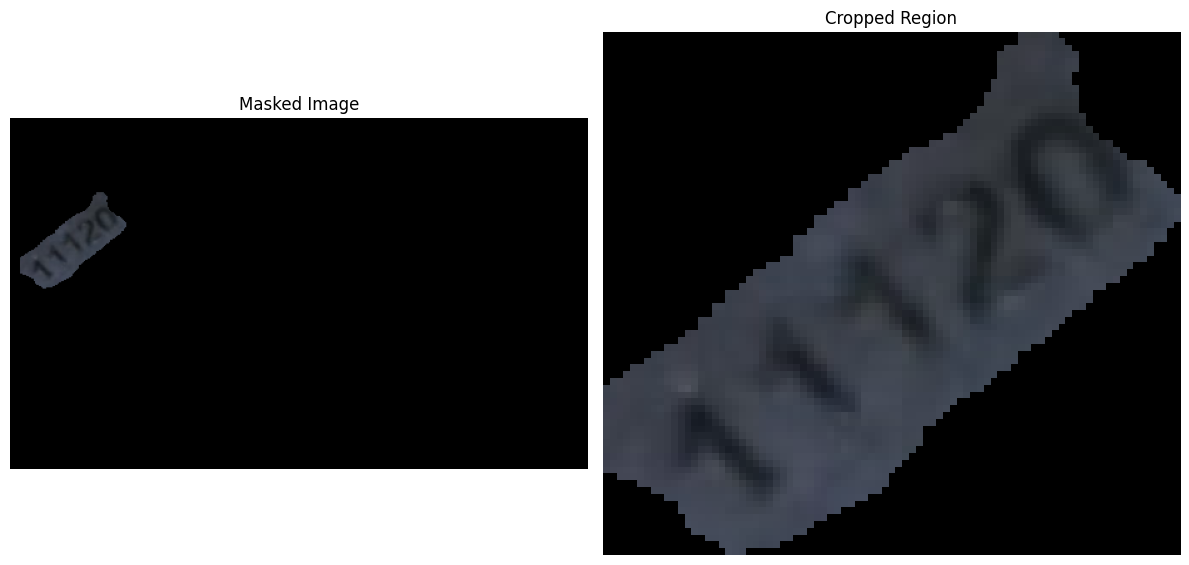

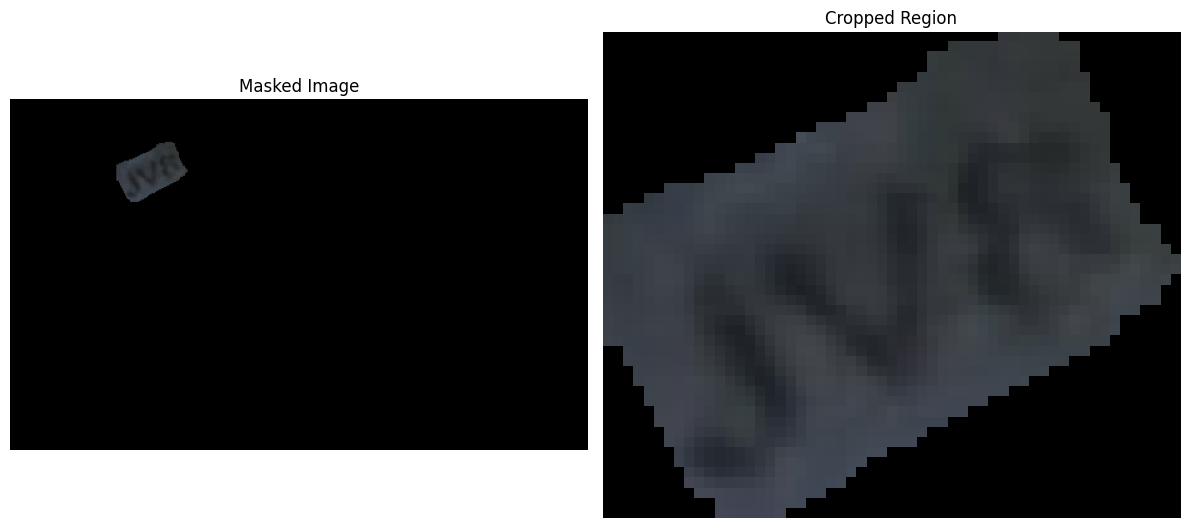

005


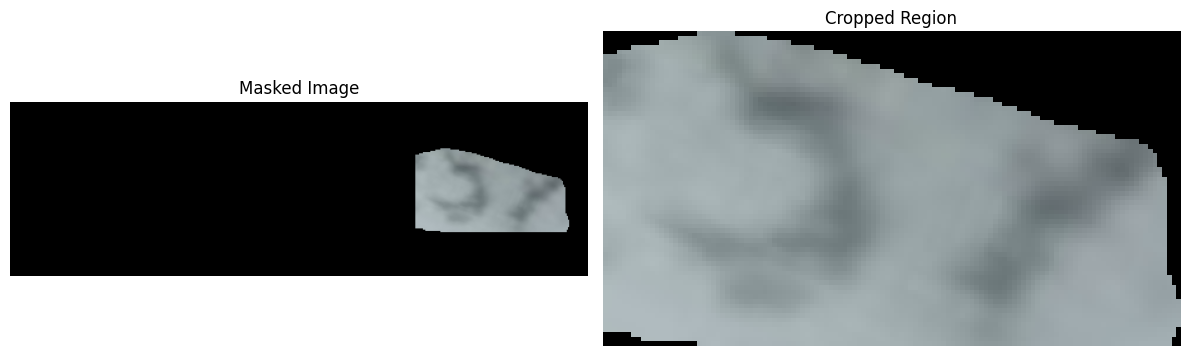

006


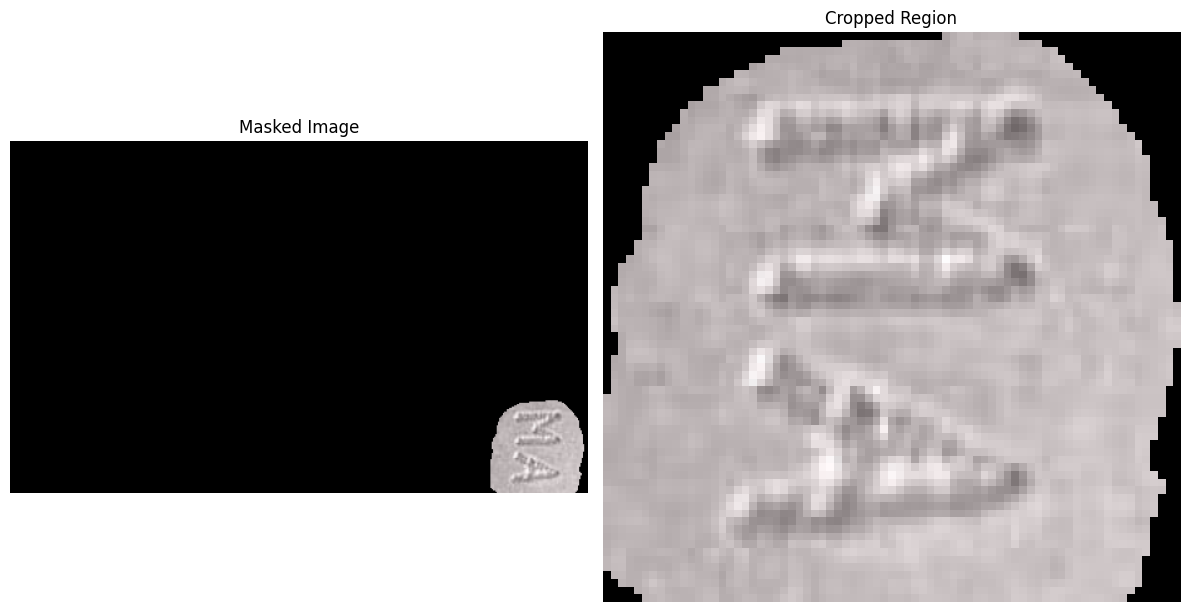

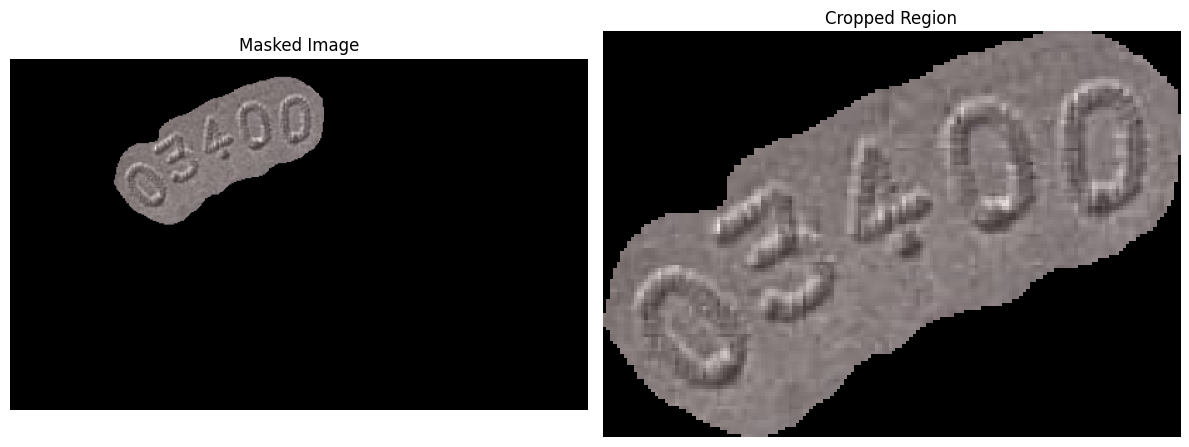

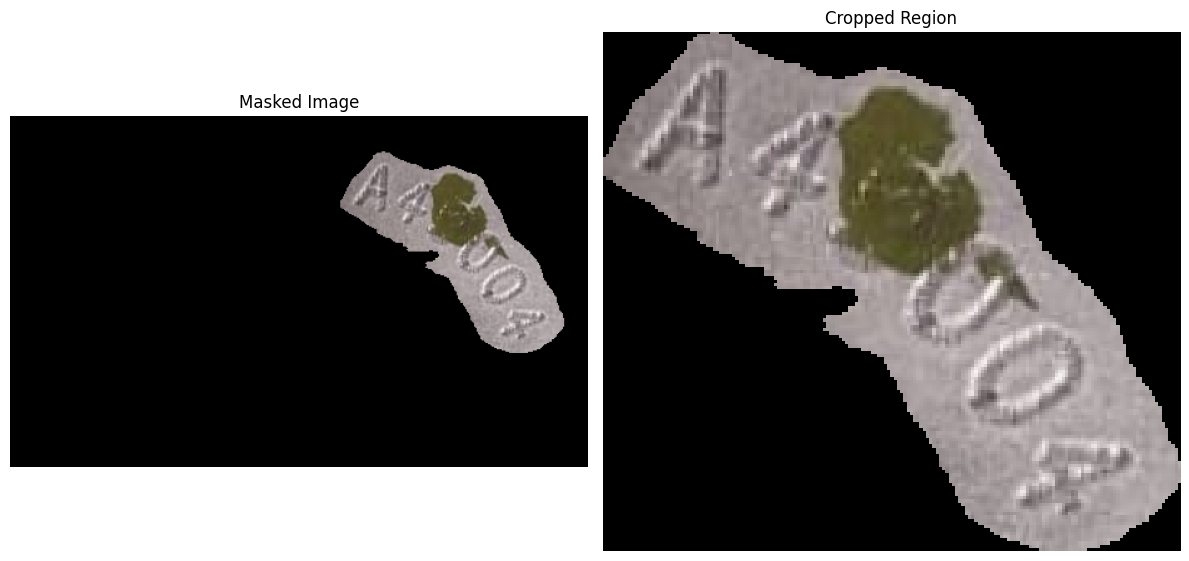

007


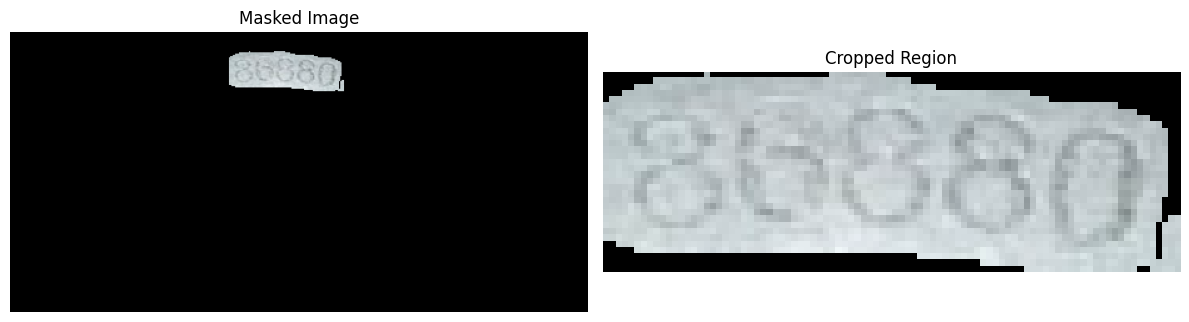

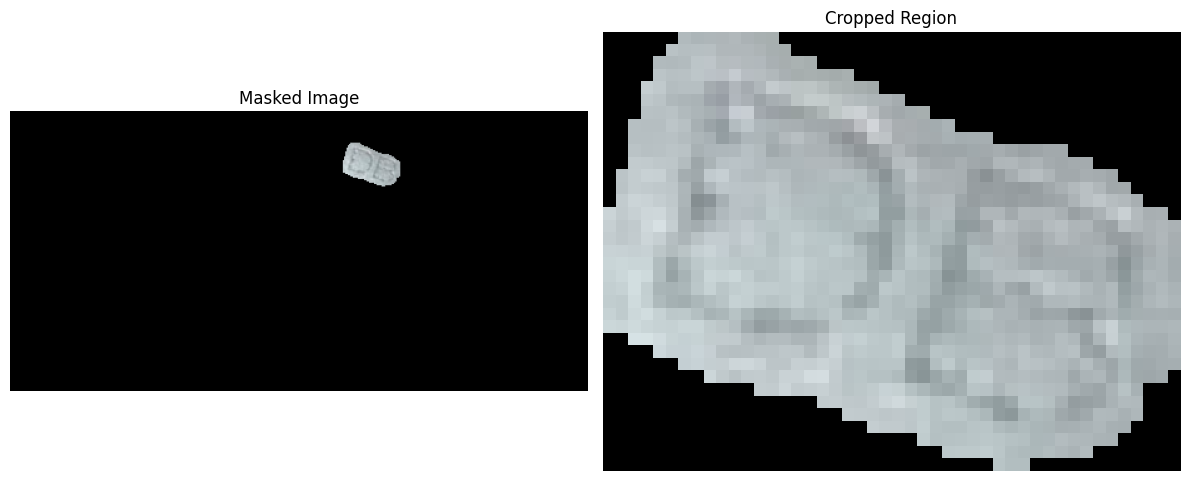

008


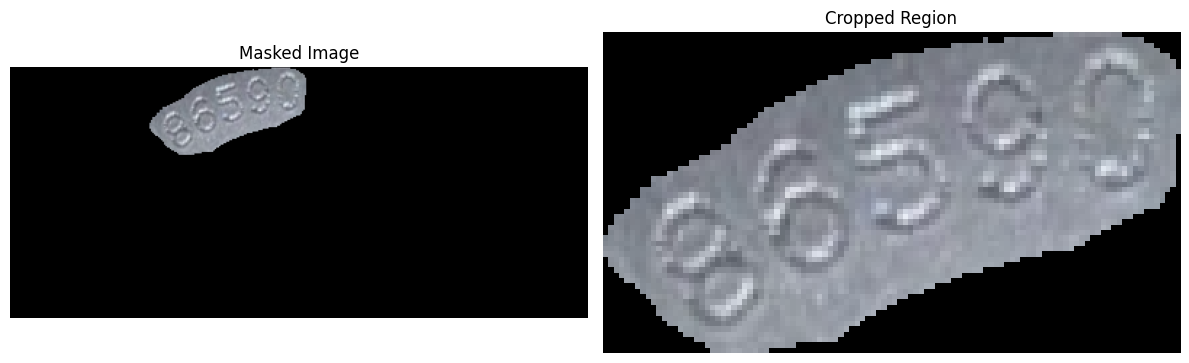

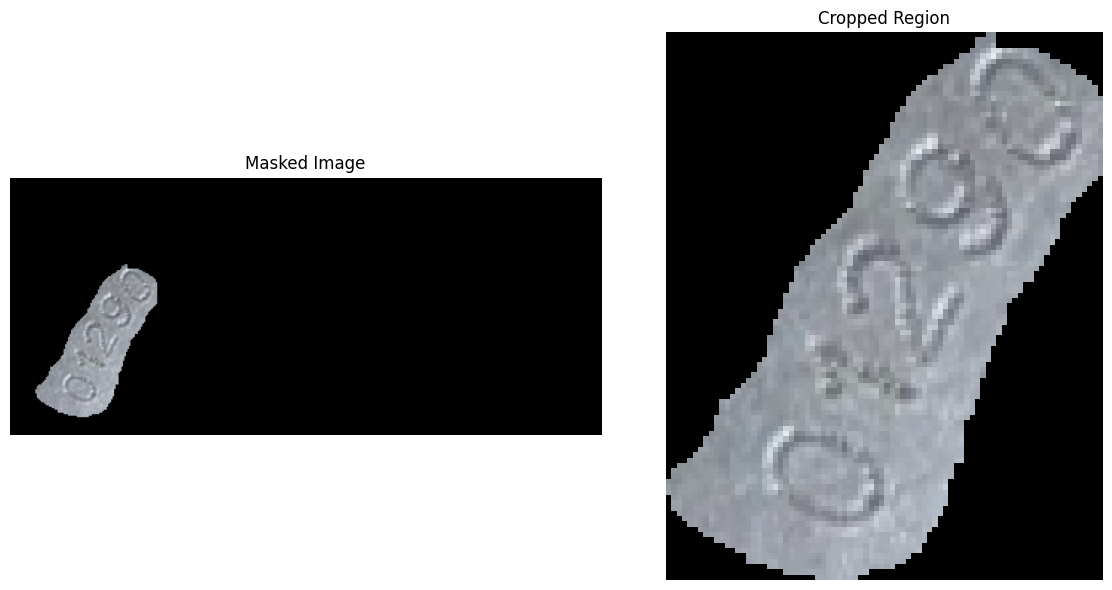

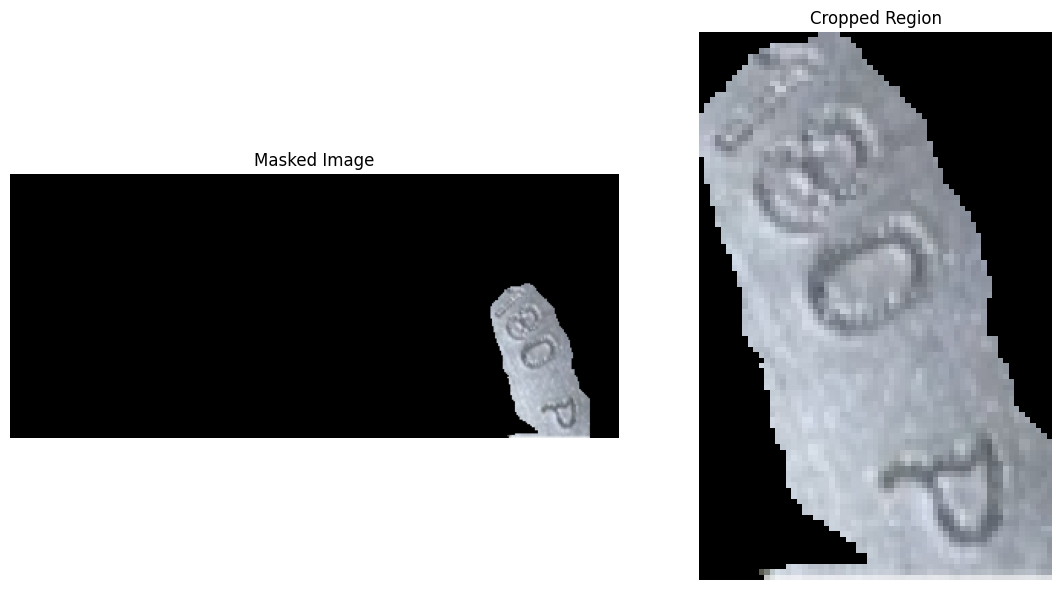

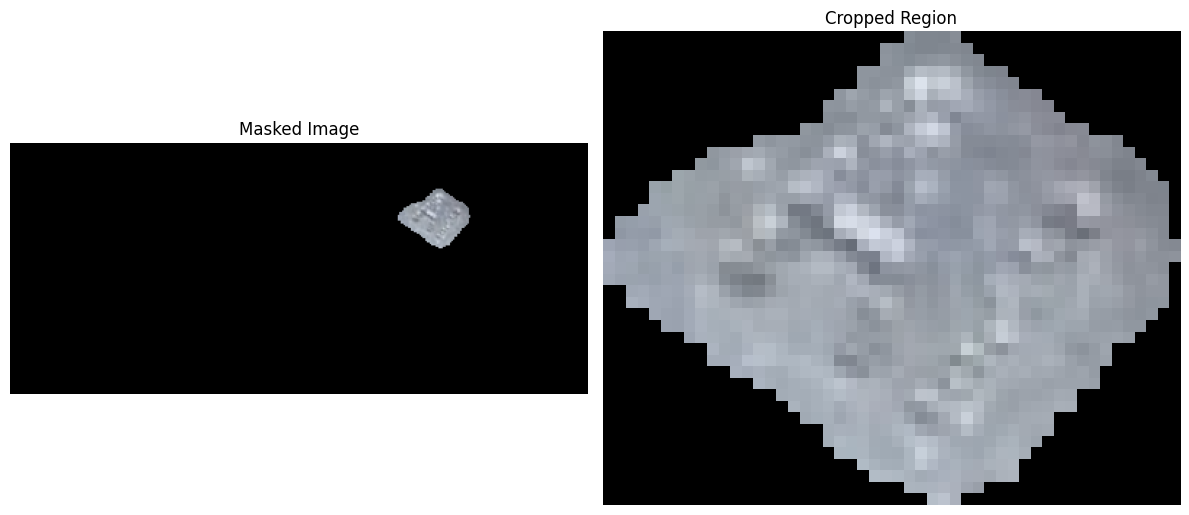

009


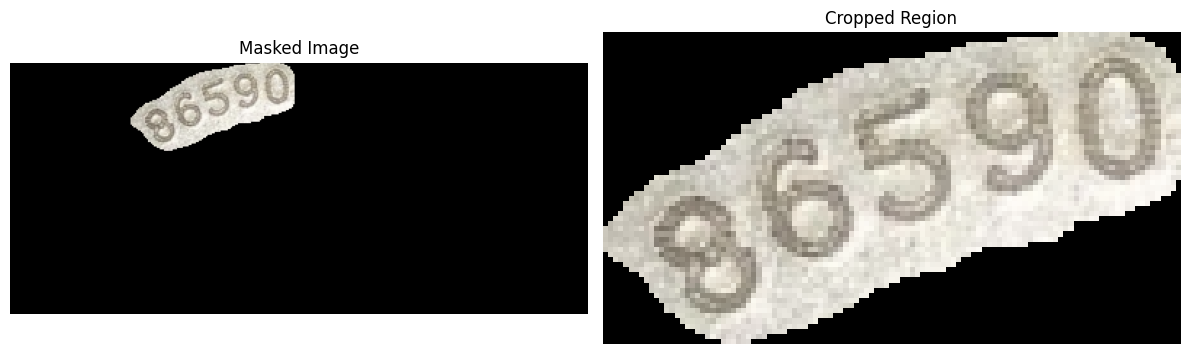

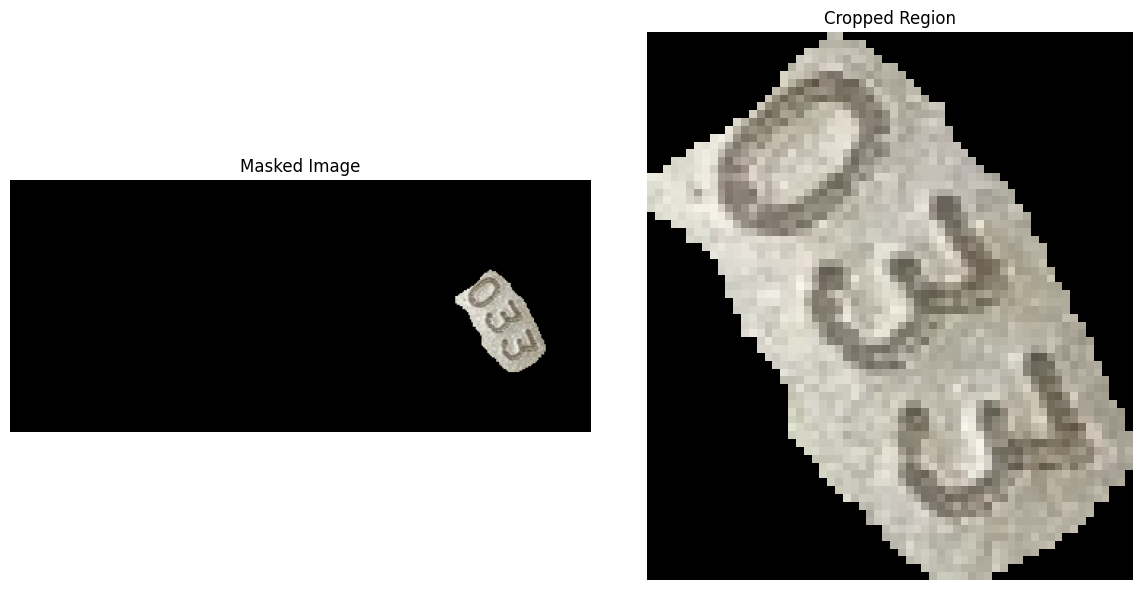

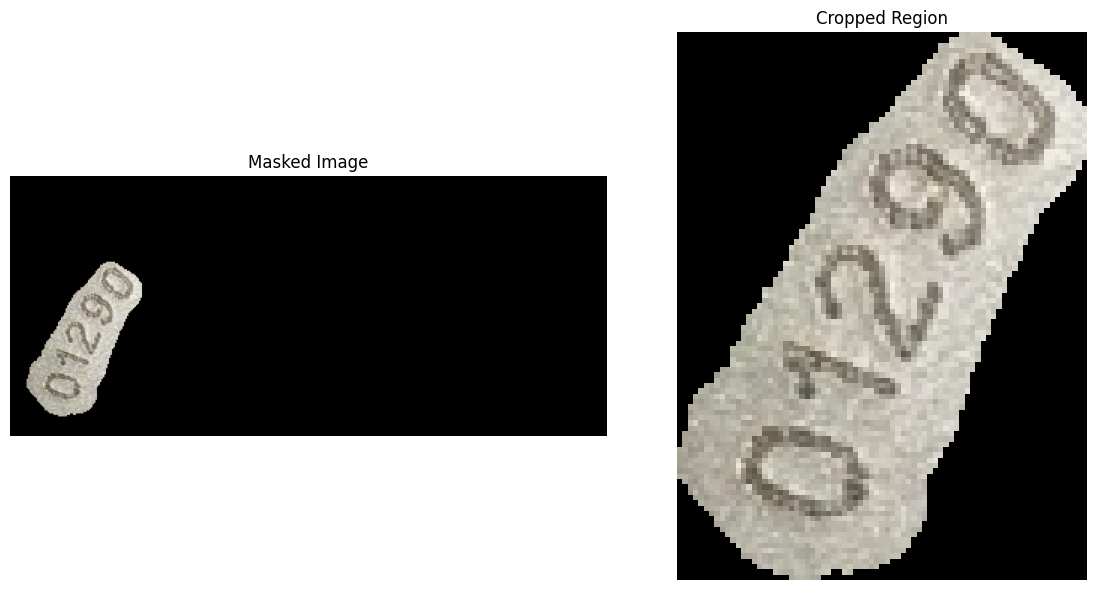

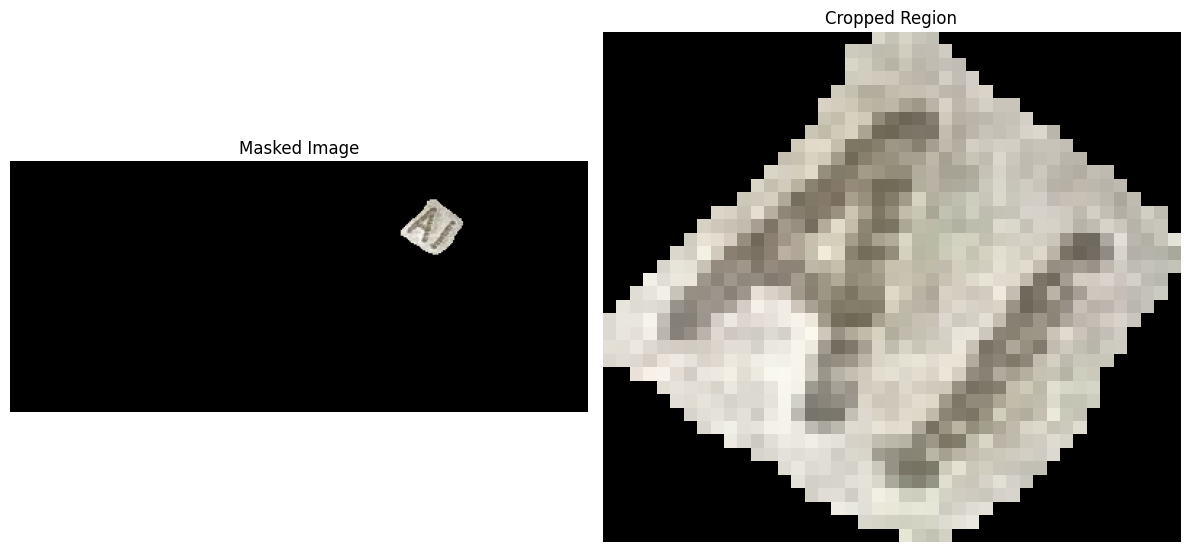

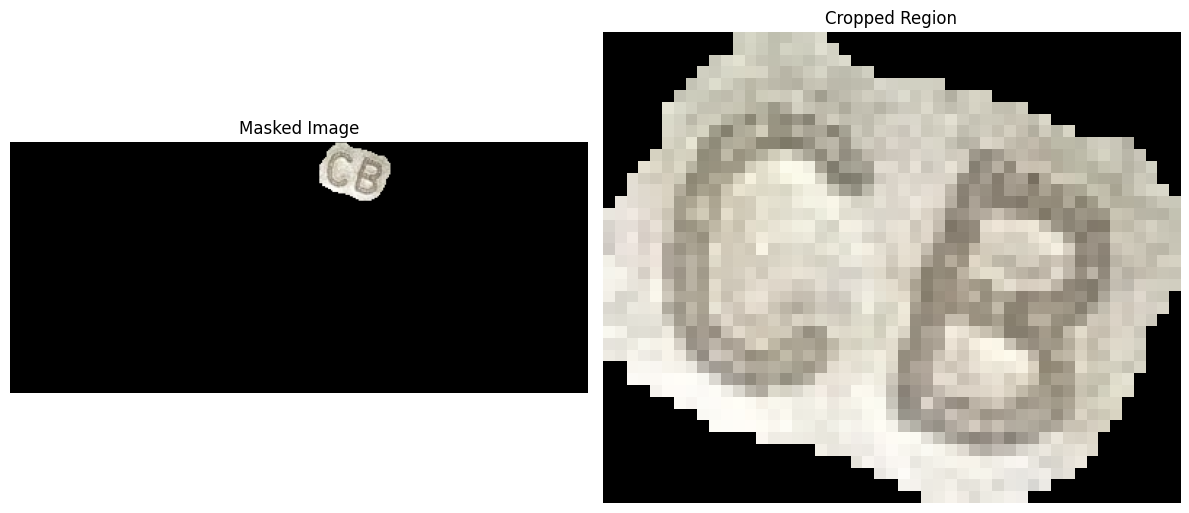

010a


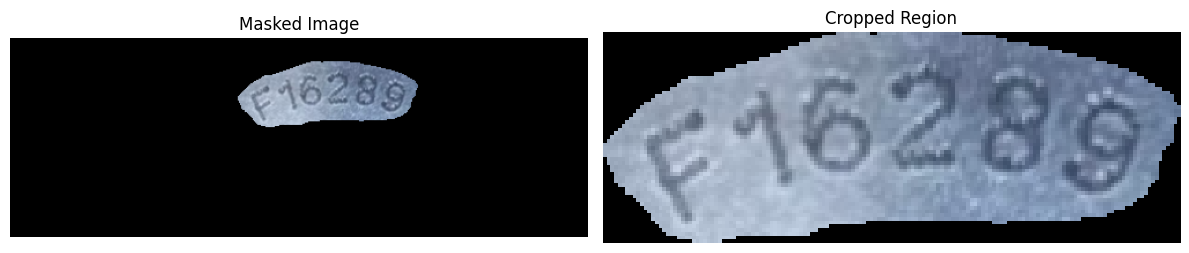

010b


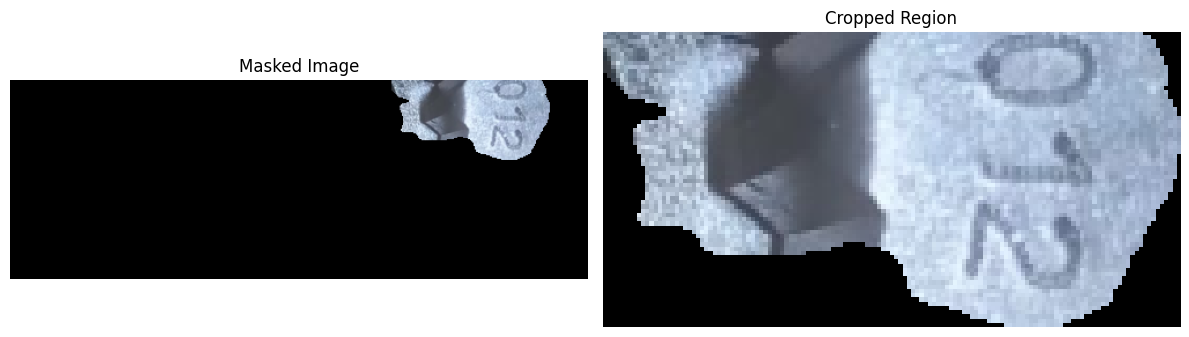

011


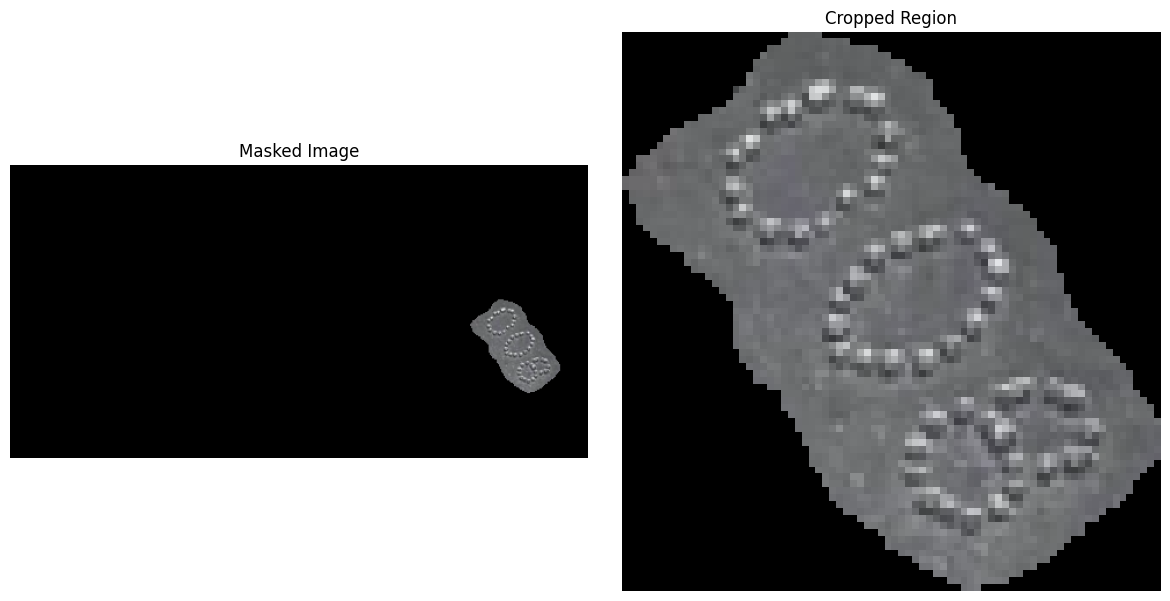

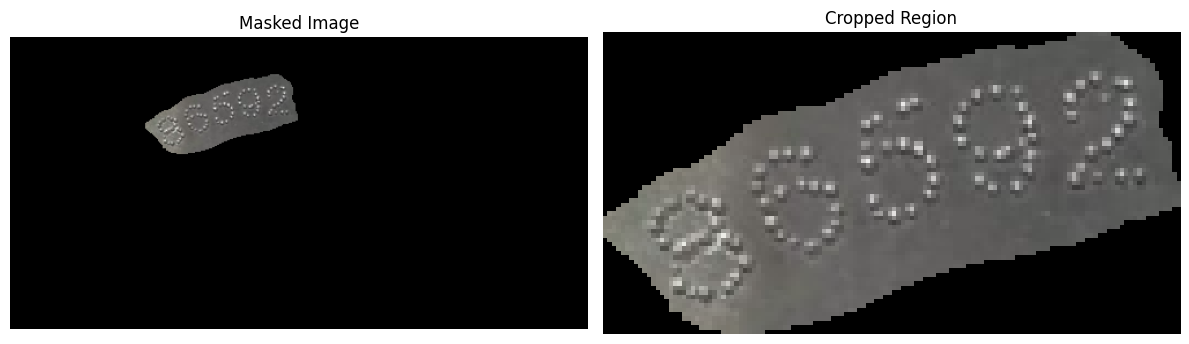

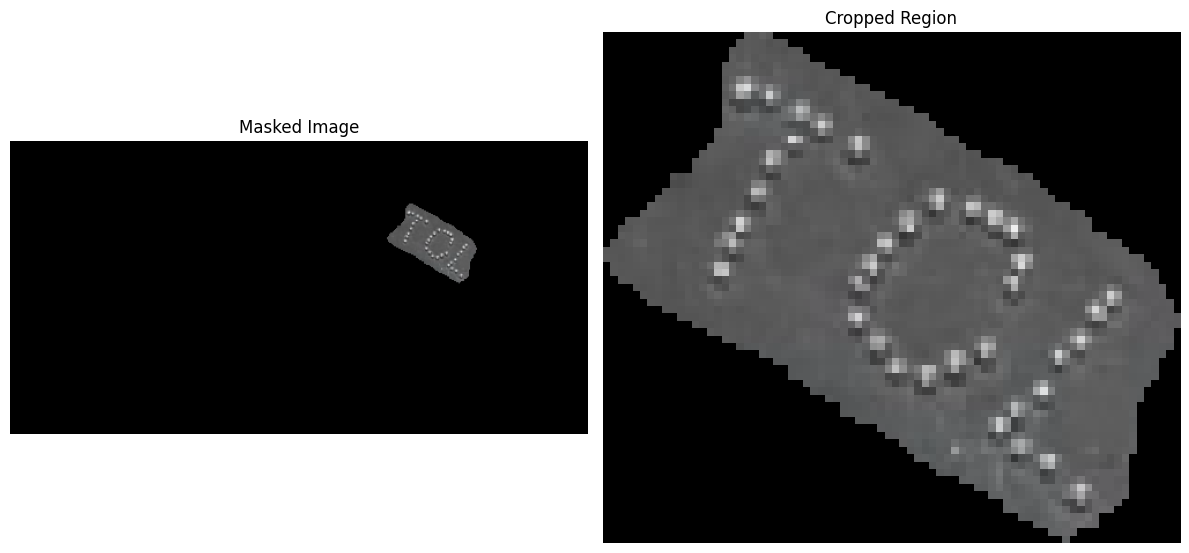

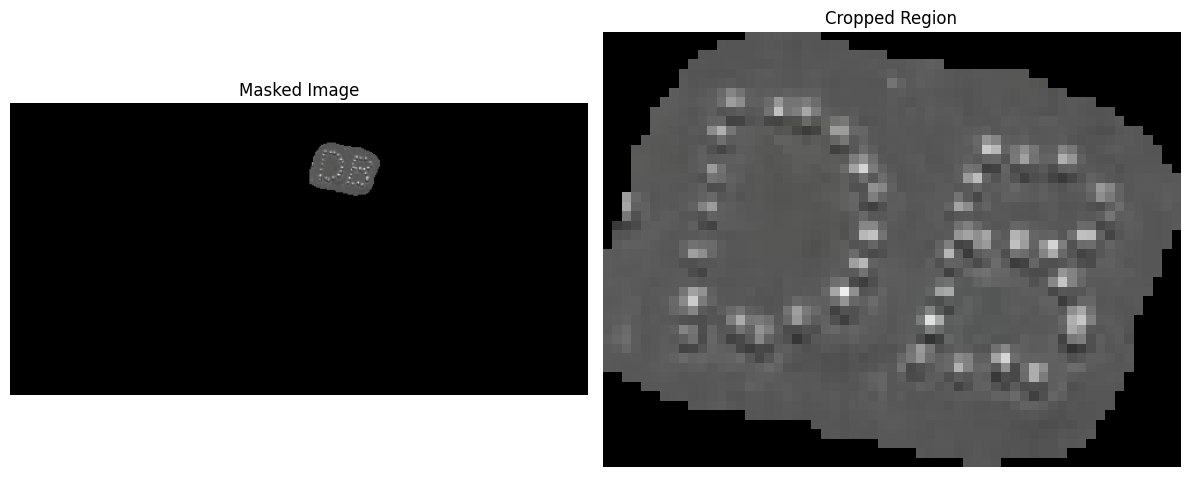

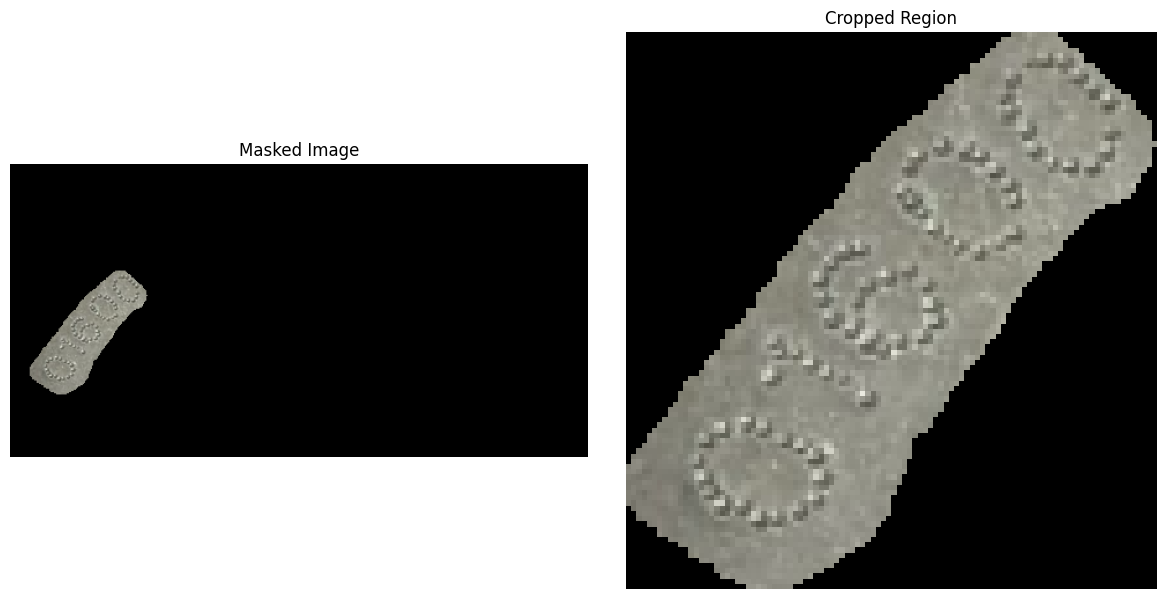

012


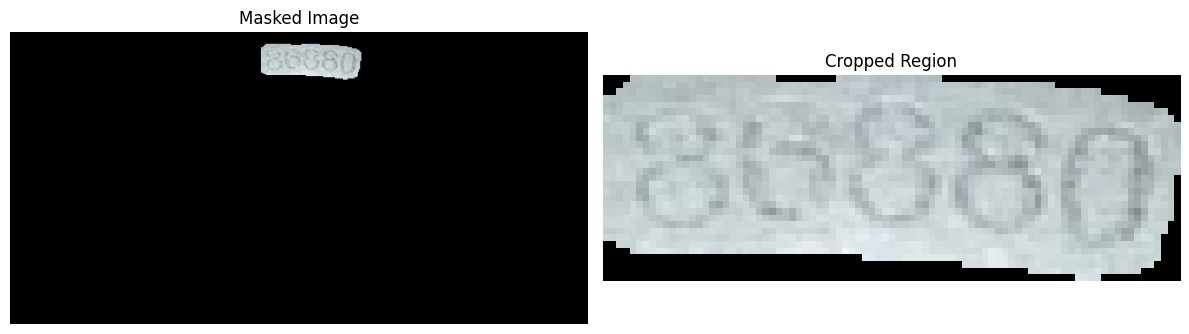

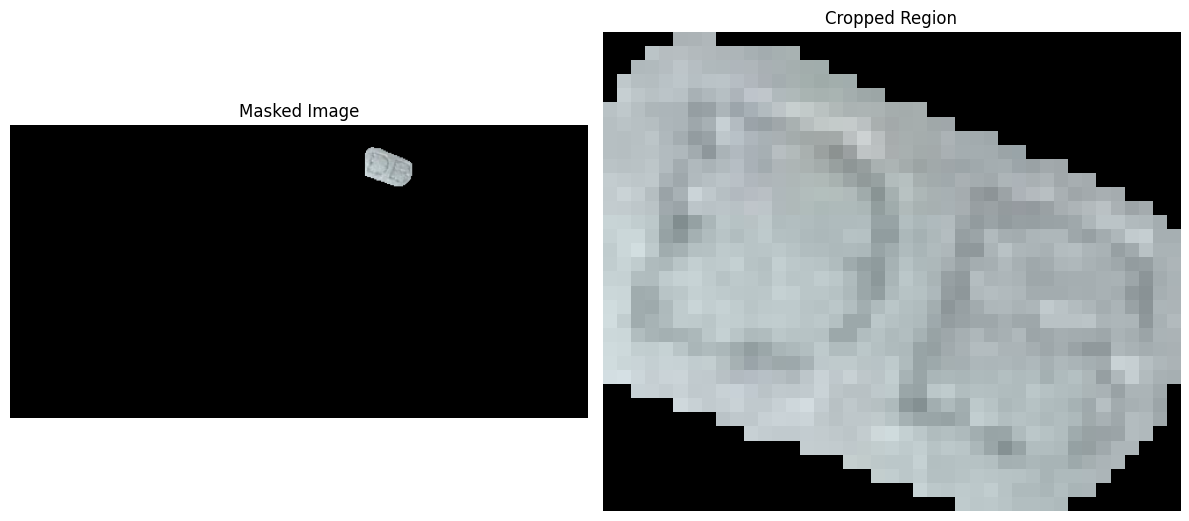

NotADirectoryError: [WinError 267] The directory name is invalid: 'gle.ipynb'

In [6]:
for i in images_folder:
    to_search = os.listdir(i)
    path = f"{folder_name}/{i}"
    print(i)
    for j in to_search:
        if j[-4:] == "json":
            process_the_image(f"{i}/{j}", path, i)

In [23]:
from paddleocr import PaddleOCR,draw_ocr
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ocr = PaddleOCR(use_angle_cls=True)

[2024/07/08 13:19:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ajay.suresh/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ajay.suresh/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec

In [25]:
ocr.ocr("imgs/002.png")

RuntimeError: (PreconditionNotMet) The third-party dynamic library (cudnn64_8.dll) that Paddle depends on is not configured correctly. (error code is 126)
  Suggestions:
  1. Check if the third-party dynamic library (e.g. CUDA, CUDNN) is installed correctly and its version is matched with paddlepaddle you installed.
  2. Configure third-party dynamic library environment variables as follows:
  - Linux: set LD_LIBRARY_PATH by `export LD_LIBRARY_PATH=...`
  - Windows: set PATH by `set PATH=XXX; (at ..\paddle\phi\backends\dynload\dynamic_loader.cc:312)
